In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import warnings
warnings.filterwarnings('ignore')

#Now we start with data preprocessing

In [141]:
import pandas as pd
import numpy as np

In [142]:
dataset=pd.read_csv('/content/drive/MyDrive/SML project/info.csv')

In [143]:
dataset.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground


In [144]:
dataset.shape

(63888, 9)

Now we remove null values

In [145]:
dataset.isnull().sum()

Unnamed: 0             0
match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [146]:
dataset['city'].isnull().value_counts()

False    55340
True      8548
Name: city, dtype: int64

In [147]:
cities = []
for i in range(len(dataset)):
  if pd.isna(dataset['city'].iloc[i]):
    cities.append(dataset['venue'].iloc[i].split()[0])
  else:
    cities.append(dataset['city'].iloc[i])

In [148]:
cities

['Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melb

In [149]:
dataset['city']=cities

In [150]:
dataset.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground


In [151]:
dataset.isnull().sum()

Unnamed: 0          0
match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [152]:
dataset['city'].value_counts()

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

In [153]:
eligible_cities = []
for city in dataset['city'].unique():
  if dataset['city'].value_counts()[city] > 600:
    eligible_cities.append(city)

In [154]:
dataset=dataset[dataset['city'].isin(eligible_cities)]

In [155]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


Now we create columns we will use as features

In [156]:
dataset['current_score']=dataset.groupby('match_id')['runs'].cumsum()

In [157]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3
...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127


In [158]:
dataset['over'] = np.floor(dataset['ball']).astype(int)

In [159]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0
...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19


In [160]:
dataset['ball_no'] = np.around((dataset['ball'] - dataset['over'])*10, decimals=0).astype(int)

In [161]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6


In [162]:
dataset['balls_bowled'] = dataset['over']*6 + dataset['ball_no']

In [163]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120


In [164]:
dataset=dataset[dataset.ball_no.astype('int')<=6]

In [165]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,0,Colombo,R Premadasa Stadium,124,19,2,116
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119


In [166]:
dataset['balls_left']=120-dataset['balls_bowled']

In [167]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,0,Colombo,R Premadasa Stadium,124,19,2,116,4
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1


In [168]:
dataset['player_dismissed']=dataset['player_dismissed'].apply(lambda x:1 if x!='0' else 0)

In [169]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,0,Colombo,R Premadasa Stadium,124,19,2,116,4
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,1,Colombo,R Premadasa Stadium,125,19,5,119,1


In [170]:
dataset['player_dismissed']=dataset['player_dismissed'].astype('int')
dataset['player_dismissed']=dataset.groupby('match_id')['player_dismissed'].cumsum()

In [171]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,8,Colombo,R Premadasa Stadium,124,19,2,116,4
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1


In [172]:
dataset['wickets_left']=10-dataset['player_dismissed']

In [173]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,8,Colombo,R Premadasa Stadium,124,19,2,116,4,2
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1


In [174]:
dataset['crr']=(dataset['current_score']*6)/dataset['balls_bowled']

In [175]:
dataset

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.000000
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.000000
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.000000
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.500000
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,120,964,Sri Lanka,Australia,19.2,0,8,Colombo,R Premadasa Stadium,124,19,2,116,4,2,6.413793
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521


In [176]:
groups=dataset.groupby('match_id')
match_ids=dataset['match_id'].unique()

In [177]:
last_five = []
for id in match_ids:
  if len(groups.get_group(id)) >= 30:
    last_five.extend(groups.get_group(id)['runs'].rolling(window=30).sum().tolist())
  else:
    last_five.extend(groups.get_group(id)['runs'].tolist())

In [178]:
dataset['last_five']=last_five

In [179]:
dataset.tail(20)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
63864,102,964,Sri Lanka,Australia,16.5,2,7,Colombo,R Premadasa Stadium,104,16,5,101,19,3,6.178218,29.0
63865,103,964,Sri Lanka,Australia,16.6,1,7,Colombo,R Premadasa Stadium,105,16,6,102,18,3,6.176471,29.0
63867,105,964,Sri Lanka,Australia,17.1,1,7,Colombo,R Premadasa Stadium,107,17,1,103,17,3,6.233010,29.0
63868,106,964,Sri Lanka,Australia,17.2,4,7,Colombo,R Premadasa Stadium,111,17,2,104,16,3,6.403846,33.0
63869,107,964,Sri Lanka,Australia,17.3,1,7,Colombo,R Premadasa Stadium,112,17,3,105,15,3,6.400000,34.0
63870,108,964,Sri Lanka,Australia,17.4,1,7,Colombo,R Premadasa Stadium,113,17,4,106,14,3,6.396226,35.0
63871,109,964,Sri Lanka,Australia,17.5,1,7,Colombo,R Premadasa Stadium,114,17,5,107,13,3,6.392523,36.0
63872,110,964,Sri Lanka,Australia,17.6,0,8,Colombo,R Premadasa Stadium,114,17,6,108,12,2,6.333333,35.0
63873,111,964,Sri Lanka,Australia,18.1,1,8,Colombo,R Premadasa Stadium,115,18,1,109,11,2,6.330275,35.0
63874,112,964,Sri Lanka,Australia,18.2,2,8,Colombo,R Premadasa Stadium,117,18,2,110,10,2,6.381818,36.0


In [180]:
final_dataset=dataset.groupby('match_id')['runs'].sum().reset_index().merge(dataset,on='match_id')

In [181]:
final_dataset.head()

,match_id,runs_x,Unnamed: 0,batting_team,bowling_team,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,155,0,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.0,NaN
1,2,155,1,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.0,NaN
2,2,155,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.0,NaN
3,2,155,3,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.5,NaN
4,2,155,4,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.6,NaN


In [182]:
final_dataset=final_dataset[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [183]:
final_dataset.dropna(inplace=True)
final_dataset.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [184]:
final_dataset=final_dataset.sample(final_dataset.shape[0])

In [185]:
copy_final_dataset= final_dataset
final_dataset

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
24946,West Indies,Australia,St Lucia,39,89,9,7.548387,37.0,103
36608,South Africa,Australia,Centurion,57,65,7,6.218182,34.0,127
16165,New Zealand,England,Durban,162,2,3,8.237288,49.0,163
44083,New Zealand,Sri Lanka,Mount Maunganui,117,36,9,8.357143,32.0,182
2272,England,New Zealand,Hamilton,177,5,4,9.234783,53.0,192
...,...,...,...,...,...,...,...,...,...
16000,Pakistan,Sri Lanka,Johannesburg,90,47,7,7.397260,51.0,188
22757,West Indies,Australia,Sydney,120,6,3,6.315789,33.0,131
34376,Pakistan,South Africa,Centurion,173,14,5,9.792453,39.0,188
15276,India,Pakistan,Durban,69,54,6,6.272727,36.0,138


#Now we make the model

In [186]:
from sklearn.preprocessing import LabelEncoder

label_encoder_team=LabelEncoder()
label_encoder_city=LabelEncoder()

label_encoder_team.fit(final_dataset['batting_team'])
final_dataset['batting_team']=label_encoder_team.transform(final_dataset['batting_team'])

label_encoder_team.fit(final_dataset['bowling_team'])
final_dataset['bowling_team']=label_encoder_team.transform(final_dataset['bowling_team'])

label_encoder_city.fit(final_dataset['city'])
final_dataset['city']=label_encoder_city.transform(final_dataset['city'])

In [187]:
final_dataset

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
24946,9,1,31,39,89,9,7.548387,37.0,103
36608,7,1,7,57,65,7,6.218182,34.0,127
16165,5,3,14,162,2,3,8.237288,49.0,163
44083,5,8,24,117,36,9,8.357143,32.0,182
2272,3,5,15,177,5,4,9.234783,53.0,192
...,...,...,...,...,...,...,...,...,...
16000,6,8,16,90,47,7,7.397260,51.0,188
22757,9,1,32,120,6,3,6.315789,33.0,131
34376,6,7,7,173,14,5,9.792453,39.0,188
15276,4,6,14,69,54,6,6.272727,36.0,138


In [188]:
from sklearn.model_selection import train_test_split

X=final_dataset.drop(columns=['runs_x'])
y=final_dataset['runs_x']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [189]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
33878,4,3,25,103,40,6,7.725000,31.0
94,1,8,22,122,25,7,7.705263,43.0
8170,6,1,13,43,88,9,8.062500,40.0
15866,7,3,5,62,61,7,6.305085,24.0
6622,8,7,5,45,82,7,7.105263,45.0
...,...,...,...,...,...,...,...,...
36665,7,1,7,116,8,3,6.214286,35.0
4278,4,3,6,51,61,7,5.186441,29.0
41931,3,7,16,135,29,7,8.901099,60.0
22685,9,1,32,38,78,8,5.428571,24.0


In [190]:
y_train

33878    168
94       155
8170     142
15866    145
6622     130
        ... 
36665    127
4278     139
41931    157
22685    131
35333    155
Name: runs_x, Length: 27615, dtype: int64

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

pipe= Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier(n_estimators=100, random_state=1))
])

In [192]:
pipe.fit(X_train,y_train)
y_predicted= pipe.predict(X_test)
pipe.score(X,y,sample_weight=None)

0.9981803367734927

In [193]:
cross_validate(pipe, X_train, y_train, cv=5)

{'fit_time': array([7.14863801, 5.54779649, 7.82268667, 5.43321586, 6.31591725]),
 'score_time': array([0.46321797, 0.54733729, 0.46674585, 0.43751621, 0.53188467]),
 'test_score': array([0.99203332, 0.99149013, 0.99221438, 0.9925765 , 0.99293862])}

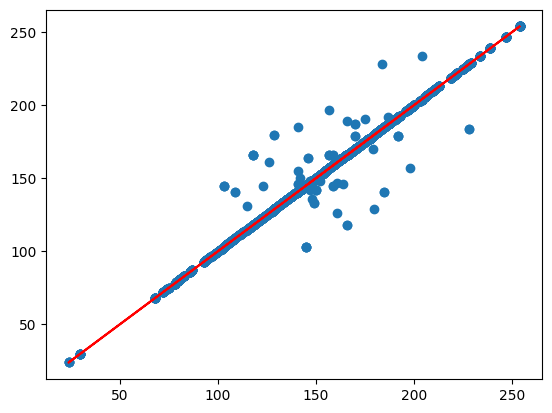

In [194]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predicted)
plt.plot(y_test,y_test,color='red')
plt.show()

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,recall_score,f1_score

print("Mean Squared error is :",mean_squared_error(y_predicted,y_test))
print("Mean Absolute error is :",mean_absolute_error(y_predicted,y_test))
print("Recall value is :",recall_score(y_test, y_predicted,average= 'micro'))
print("F1 score is :",f1_score(y_predicted,y_test,average= 'micro'))

Mean Squared error is : 6.545355784899511
Mean Absolute error is : 0.18185768604019556
Recall value is : 0.9927213470939706
F1 score is : 0.9927213470939706


#Now we predict with some user input

In [196]:
final_dataset['batting_team']=label_encoder_team.inverse_transform(final_dataset['batting_team'])
final_dataset['bowling_team']=label_encoder_team.inverse_transform(final_dataset['bowling_team'])
final_dataset['city']=label_encoder_city.inverse_transform(final_dataset['city'])
final_dataset.sample(15)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
30862,India,England,Colombo,149,9,7,8.054054,46.0,159
23052,Pakistan,Bangladesh,St Lucia,77,63,10,8.105263,39.0,171
29193,South Africa,New Zealand,Auckland,161,2,3,8.186441,26.0,160
2719,Bangladesh,Sri Lanka,Colombo,97,38,5,7.097561,26.0,143
6659,Sri Lanka,South Africa,Cape Town,78,45,5,6.240000,25.0,130
8956,Australia,Sri Lanka,Adelaide,191,22,9,11.693878,63.0,228
10780,India,New Zealand,Hamilton,121,34,7,8.441860,30.0,177
27382,Pakistan,New Zealand,Auckland,110,17,2,6.407767,25.0,141
9477,Australia,South Africa,Johannesburg,84,71,9,10.285714,44.0,177
32594,West Indies,Australia,Colombo,59,72,8,7.375000,42.0,198


In [197]:
batting_team= input("Enter the batting team :")
bowling_team= input("Enter the bowling team :")
city= input("Enter the city :")
current_score= int(input("Enter the current score :"))
current_balls= int(input("Enter the no of balls played(only overs>5, balls>30) :"))
wickets= int(input("Enter the no of wickets fallen :"))
last_runs= int(input("Enter the runs scored in last 5 overs :"))

Enter the batting team :India
Enter the bowling team :New Zealand
Enter the city :Hamilton
Enter the current score :121
Enter the no of balls played(only overs>5, balls>30) :86
Enter the no of wickets fallen :3
Enter the runs scored in last 5 overs :30


In [198]:
balls_left = 120 - current_balls
wickets_left = 10 - wickets
crr = current_score/(current_balls/6)

input_df = pd.DataFrame({
    'batting_team': [batting_team],
    'bowling_team': [bowling_team],
    'city':city,
    'current_score': [current_score],
    'balls_left': [balls_left],
    'wickets_left': [wickets],
    'crr': [crr],
    'last_five': [last_runs]})

In [199]:
input_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
0,India,New Zealand,Hamilton,121,34,3,8.44186,30


In [200]:
input_df['batting_team']=label_encoder_team.transform(input_df['batting_team'])
input_df['bowling_team']=label_encoder_team.transform(input_df['bowling_team'])
input_df['city']=label_encoder_city.transform(input_df['city'])

In [201]:
result= pipe.predict(input_df)

In [202]:
print("The score that is predicted is :",result,"runs.")

The score that is predicted is : [177] runs.
